Open and check data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [3]:
train = pd.read_csv('datasets/gold_recovery_train.csv')
test = pd.read_csv('datasets/gold_recovery_test.csv')
full = pd.read_csv('datasets/gold_recovery_full.csv')

In [4]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
#train.info()

- Calculate recovery

In [6]:
C = train['rougher.output.concentrate_au']
F= train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
feature_recovery = train['rougher.output.recovery']

In [7]:
R = ((C * (F - T)) / (F * (C - T))) * 100

In [8]:
R.head(), feature_recovery.head()

(0    87.107763
 1    86.843261
 2    86.842308
 3    87.226430
 4    86.688794
 dtype: float64,
 0    87.107763
 1    86.843261
 2    86.842308
 3    87.226430
 4    86.688794
 Name: rougher.output.recovery, dtype: float64)

In [9]:
mae = np.sum(np.abs(R - feature_recovery)) / len(feature_recovery)

In [10]:
mae

8.00350954615662e-15

**The recovery was calculated correctly since the MAE is a low value.**

- Features not available in the test set:
    - What are these parameters?
    - What is their type?

In [11]:
#train.info()

In [12]:
train_cols = list(train.columns)
test_cols = list(test.columns)

In [13]:
non_test_cols = []
for i in train_cols:
    if i not in test_cols:
        non_test_cols.append(i)

In [14]:
print(len(train_cols))
print(len(test_cols))
len(non_test_cols)

87
53


34

In [15]:
non_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**The features not available in the test set are product parameters and calculation characteristics of all the stages. They are float types.**

- Data preprocessing

I will drop all the columns from the trained data that are not in the test data.

In [16]:
#test.isnull().sum()

In [17]:
test.shape

(5856, 53)

In [18]:
train.fillna(method='ffill', inplace=True)

In [19]:
test.fillna(method='ffill', inplace=True)

In [20]:
#check for duplicates

In [21]:
train.duplicated().sum()

0

In [22]:
test.duplicated().sum()

0

In [23]:
#train.drop(non_test_cols, axis=1, inplace=True)

In [24]:
#train.info()

In [25]:
#train['primary_cleaner.output.concentrate_au'].mean()

In [26]:
#train['primary_cleaner.output.concentrate_ag'].mean()

In [27]:
#train['primary_cleaner.output.concentrate_pb'].mean()

2. Data Analysis

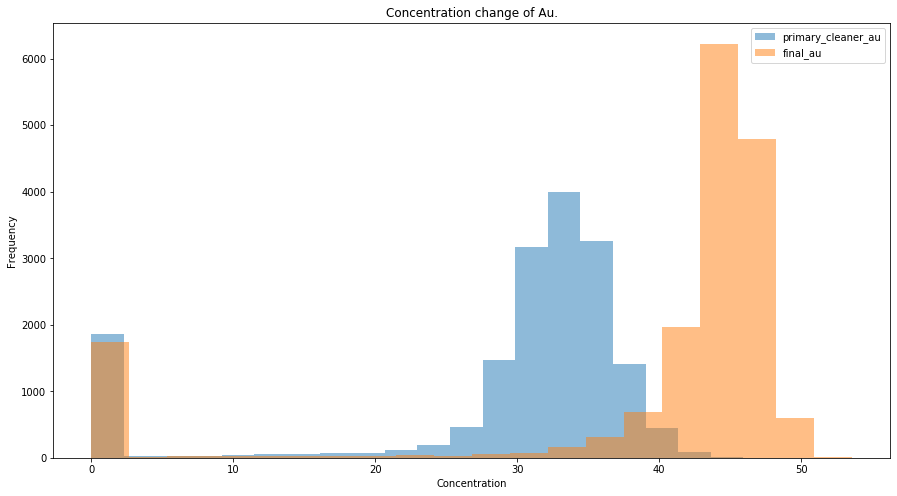

In [28]:
x1 = train['primary_cleaner.output.concentrate_au']
x2 = train['final.output.concentrate_au']

kwargs = dict(histtype='stepfilled', alpha=0.5, bins=20)

plt.figure(figsize=(15,8))
plt.hist(x1, **kwargs, label='primary_cleaner_au')
plt.hist(x2, **kwargs, label='final_au')
plt.title('Concentration change of Au.')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend();

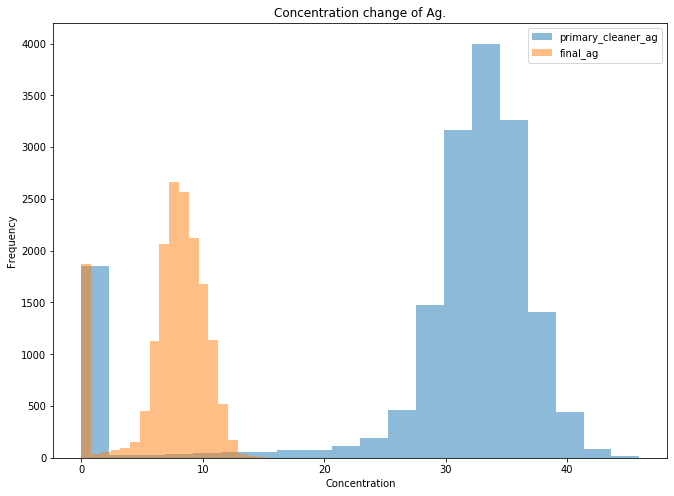

In [29]:
x2 = train['primary_cleaner.output.concentrate_ag']
x3 = train['final.output.concentrate_ag']

#kwargs = dict(histtype='stepfilled', alpha=0.5, bins=20)

plt.figure(figsize=(11,8))
plt.hist(x1, **kwargs, label='primary_cleaner_ag')
plt.hist(x2, **kwargs, label='final_ag')
plt.title('Concentration change of Ag.')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend();

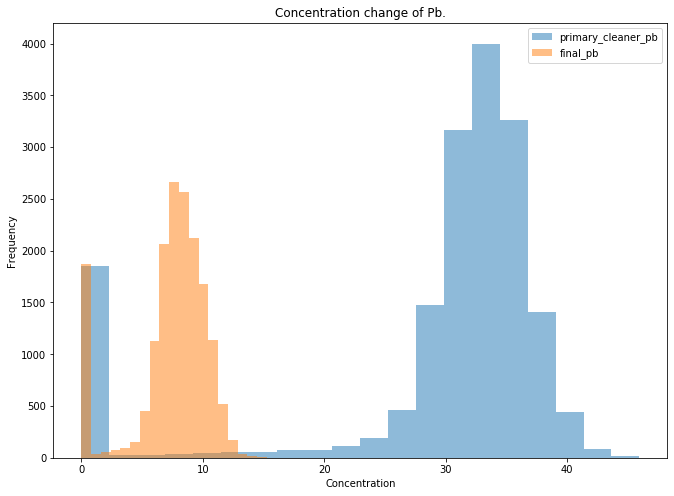

In [30]:
x5 = train['primary_cleaner.output.concentrate_pb']
x6 = train['final.output.concentrate_pb']

#kwargs = dict(histtype='stepfilled', alpha=0.5, bins=20)

plt.figure(figsize=(11,8))
plt.hist(x1, **kwargs, label='primary_cleaner_pb')
plt.hist(x2, **kwargs, label='final_pb')
plt.title('Concentration change of Pb.')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend();

**The concentrations of Au increased from the primary to the secondary purification stages.**

**While the concentration of Ag and Pb both decreased from the primary to the secondary purification stages.**

In [31]:
train['primary_cleaner.input.feed_size']
train['rougher.input.feed_size']
test['primary_cleaner.input.feed_size']
test['rougher.input.feed_size']

0       62.710452
1       61.961163
2       66.903807
3       59.865919
4       63.315324
          ...    
5851    66.758479
5852    62.560684
5853    73.647513
5854    78.066446
5855    77.678700
Name: rougher.input.feed_size, Length: 5856, dtype: float64

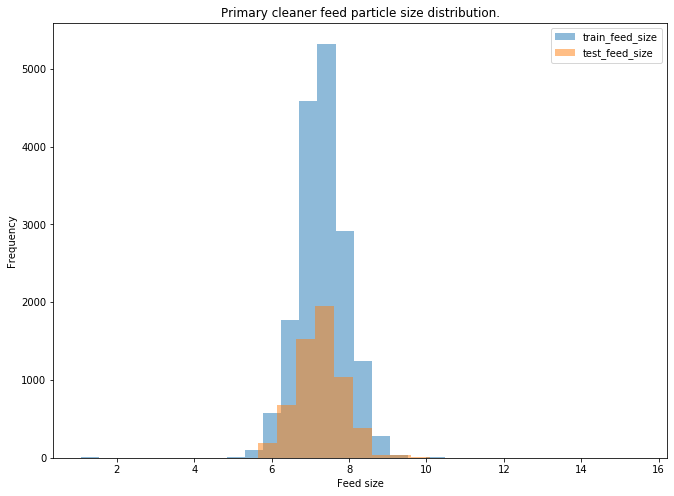

In [32]:
f1 = train['primary_cleaner.input.feed_size']
f2 = test['primary_cleaner.input.feed_size']

plt.figure(figsize=(11,8))
plt.hist(f1, **kwargs, label='train_feed_size')
plt.hist(f2, **kwargs, label='test_feed_size')
plt.title('Primary cleaner feed particle size distribution.')
plt.xlabel('Feed size')
plt.ylabel('Frequency')
plt.legend();

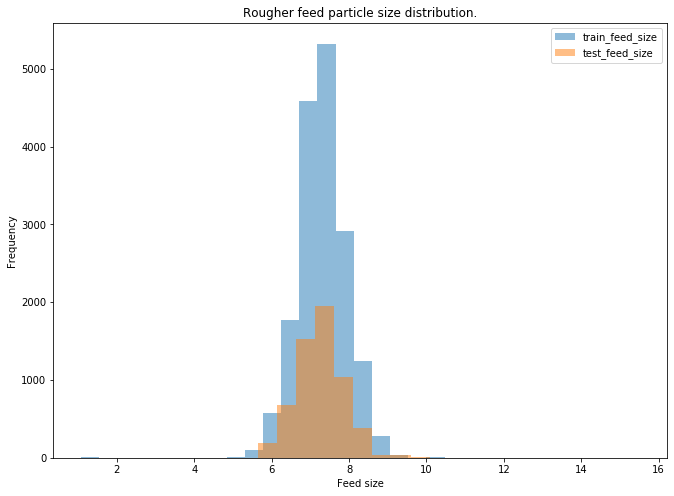

In [33]:
f3 = train['rougher.input.feed_size']
f4 = test['rougher.input.feed_size']

plt.figure(figsize=(11,8))
plt.hist(f1, **kwargs, label='train_feed_size')
plt.hist(f2, **kwargs, label='test_feed_size')
plt.title('Rougher feed particle size distribution.')
plt.xlabel('Feed size')
plt.ylabel('Frequency')
plt.legend();

**The feed particle size for the test and training set do not vary significantly. They are within the same range.**

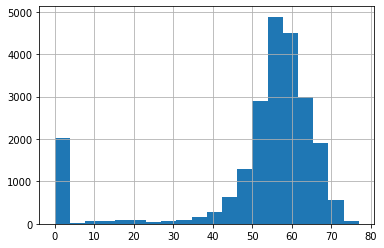

In [34]:
#total concentrations of all substances
features_raw_concentrate = ['rougher.input.feed_au', 'rougher.input.feed_ag', 
                              'rougher.input.feed_pb', 'rougher.input.feed_sol']
full[features_raw_concentrate].sum(1).hist(bins=20);

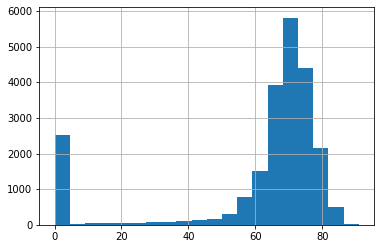

In [35]:
features_rougher_concentrate = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                              'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
full[features_rougher_concentrate].sum(1).hist(bins=20);

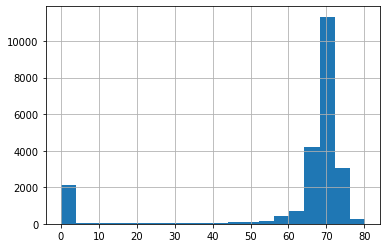

In [36]:
features_final_concentrate = ['final.output.concentrate_au', 'final.output.concentrate_ag', 
                              'final.output.concentrate_pb', 'final.output.concentrate_sol']
full[features_final_concentrate].sum(1).hist(bins=20);

**There are abnormal values in the distribution that are very close to zero for all the different stages.**

**Yes, it is worth removing the outliers from both the train and test samples to create uniformity on training the model.**

In [37]:
test.shape

(5856, 53)

In [38]:
train.shape

(16860, 87)

In [39]:
def anomaly_dropper(features_concentrate):
    for feature in features_concentrate:
        train.drop(full[full[feature] == 0].index, axis='index', errors='ignore', inplace=True)
        test.drop(full[full[feature] == 0].index, axis='index', errors='ignore', inplace=True)

In [40]:
anomaly_dropper(features_raw_concentrate)
anomaly_dropper(features_rougher_concentrate)
anomaly_dropper(features_final_concentrate)

In [41]:
test.shape

(5216, 53)

In [42]:
train.shape

(15079, 87)

3. Build the model

In [43]:
mae = np.sum(np.abs(R - feature_recovery)) / len(feature_recovery)

In [44]:
#function to calculate the final sMAPE value
def smape_calculator(y_true, y_pred):
    rougher_recovery = (np.sum(np.abs(y_true[0] - y_pred[0]) / ((np.abs(y_true[0]) + np.abs(y_pred[0]))/2)) / len(y_true[0])) * 100
    final_recovery = (np.sum(np.abs(y_true[1] - y_pred[1]) / ((np.abs(y_true[1]) + np.abs(y_pred[1]))/2)) / len(y_true[1])) * 100
    final_sMAPE = (0.25 * rougher_recovery) + (0.75 * final_recovery)
    return final_sMAPE

In [45]:
def concentrate_smape(target, concentrate):
    concentrate_recovery = (np.sum(np.abs(target - concentrate) / ((np.abs(target) + np.abs(concentrate))/2)) / len(target)) * 100
    return concentrate_recovery

   - train different models
   - evaluate them using cross-validation
   - pick the best model
        - test it using the test sample
   - provide findings.

In [46]:
#drop the train columns that are not in the test data.
#drop the date column. It is not significant in prediction.

In [47]:
#split the train data: features and target
#train and validation: check cross-validation

In [48]:
test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [49]:
#drop the date column from both the test and train data
train.drop('date', axis=1, inplace=True)
test.drop('date', axis=1, inplace=True)

In [50]:
target = train[['rougher.output.recovery', 'final.output.recovery']]
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']
features = train.drop(non_test_cols, axis=1)

In [51]:
features.shape, target.shape, test.shape

((15079, 52), (15079, 2), (5216, 52))

In [52]:
#select best model for rougher

In [53]:
#dt rougher
model_lr = LinearRegression()
model_lr.fit(features, target_rougher)
predicted_lr_rougher = pd.Series(model_lr.predict(test), index=test.index)

In [54]:
#dt final
model_lr.fit(features, target_final)
predicted_lr_final = pd.Series(model_lr.predict(test), index=test.index)

In [55]:
r_target = full.loc[full.index[predicted_lr_rougher.index]]['final.output.recovery']
f_target = full.loc[full.index[predicted_lr_final.index]]['final.output.recovery']

In [56]:
smape_calculator(r_target, f_target, predicted_lr_rougher, predicted_lr_final)

TypeError: smape_calculator() takes 2 positional arguments but 4 were given

In [ ]:
for i in range(1, 11):
    model_dt = DecisionTreeRegressor(max_depth=i, random_state=0)
    rougher_score_dt = np.mean(cross_val_score(model_dt, features, target_rougher, cv=3))
    final_score_dt = np.mean(cross_val_score(model_dt, features, target_final, cv=3))
    print('Max depth:', i, 'rougher_score:', rougher_score_dt, 'final_score:', final_score_dt)

**At max_depth=4, is where the cross_val_score is highest for the rougher and final targets.**

In [ ]:
#Random Forest Regressor
for i in range(10, 71, 10):
    model_rf = RandomForestRegressor(n_estimators=i, max_depth=10, random_state=0)
    rougher_score_rf = np.mean(cross_val_score(model_rf, features, target_rougher, cv=3))
    final_score_rf = np.mean(cross_val_score(model_rf, features, target_final, cv=3))
    print('Estimators:', i, 'rougher_score:', rougher_score_rf, 'final_score:', final_score_rf)

In [ ]:
#Linear Regressor
model_lr = LinearRegression()
rougher_score_lr = np.mean(cross_val_score(model_lr, features, target_rougher, cv=3))
final_score_lr = np.mean(cross_val_score(model_lr, features, target_final, cv=3))
#print('Average Linear Regressor evaluation score:', final_score_lr)
print('rougher_score:', rougher_score_lr, 'final_score:', final_score_lr)

In [ ]:
model_dt = DecisionTreeRegressor(max_depth=4, random_state=0)
#cv_results = cross_validate(model_dt, features, target_rougher, cv=3, scoring=('concentrate_smape'), return_train_score=True)
#print(cv_results)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(concentrate_smape, greater_is_better=True)
grid = GridSearchCV(model_dt, scoring=scorer)

In [ ]:
model_rf.fit(features, target_final)
final_predictions = model_rf.predict(test)

In [ ]:
final_predictions

In [ ]:
f_pred = pd.Series(final_predictions, index=test.index)

In [ ]:
f_pred

In [ ]:
f_target = full.loc[full.index[f_pred.index]]['final.output.recovery']

In [ ]:
f_pred.shape, f_target.shape

In [ ]:
final_recovery = (np.sum(np.abs(f_target - f_pred) / ((np.abs(f_target) + np.abs(f_pred))/2)) / len(f_target)) * 100

In [ ]:
final_recovery

In [ ]:
cross_val_score?

In [65]:
cross_validate?

In [ ]:
make_scorer?

In [ ]:
GridSearchCV?

In [ ]:
model_dt.fit(X, y)
preds = pd.DataFrame(model_dt.predict(test))
preds[0], preds[1from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import  cross_val_score
import time
from sklearn.datasets import  load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris = load_iris()

models = [GaussianNB(), DecisionTreeClassifier(), SVC()]
names = ["Naive Bayes", "Decision Tree", "SVM"]

def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=3, average='macro'), 
            recall_score(y, yPred, pos_label=3, average='macro'))

def my_scorer(estimator, x, y):
    a, p, r = getScores(estimator, x, y)
    print a, p, r
    return a+p+r

for model, name in zip(models, names):
    print name
    start = time.time()
    m = cross_val_score(model, iris.data, iris.target,scoring=my_scorer, cv=10).mean()
    print '\nSum:',m, '\n\n'
    print 'time', time.time() - start, '\n\n']


In [ ]:
precision_score??

In [58]:
models = [DecisionTreeRegressor(), RandomForestRegressor(), LinearRegression()]
names = ["Decision Tree", "Random Forest", "Linear"]

def finalsMAPE(rougher, final):
    #y_pred = estimator.predict(X)
    #rougher_recovery = (np.sum(np.abs(y[0] - y_pred[0]) / ((np.abs(y[0]) + np.abs(y_pred[0]))/2)) / len(y[0])) * 100
    #final_recovery = (np.sum(np.abs(y[1] - y_pred[1]) / ((np.abs(y[1]) + np.abs(y_pred[1]))/2)) / len(y[1])) * 100
    final_sMAPE = (0.25 * rougher) + (0.75 * final)
    return final_sMAPE
    #return mean_absolute_error(y, y_pred)
def stagesMAPE(estimator, X, y):
    y_pred = estimator.predict(X)
    stage_recovery_sMAPE = (np.sum(np.abs(y - y_pred) / ((np.abs(y) + np.abs(y_pred))/2)) / len(y)) * 100
    return stage_recovery_sMAPE

def my_scorer(estimator, X, y):
    #sMAPE = getScores(estimator, X, y)
    sMAPE = stagesMAPE(estimator, X, y)
    #print sMAPE
    return sMAPE

for model, name in zip(models, names):
    print(name)
    rougher_output_sMAPE = cross_val_score(model, features, target_rougher, scoring=my_scorer, cv=5).mean()
    final_output_sMAPE = cross_val_score(model, features, target_final, scoring=my_scorer, cv=5).mean()
    final_sMAPE = finalsMAPE(rougher_output_sMAPE, final_output_sMAPE)
    print('\nMean:',final_sMAPE, '\n\n')
    #print 'time', time.time() - start, '\n\n'

Decision Tree


KeyboardInterrupt: 

In [79]:
model_rf = RandomForestRegressor(random_state=0)
scores_rougher = cross_validate(model_rf, features, target_rougher, scoring=my_scorer, cv=3, 
                                return_train_score=True, return_estimator=True)
rf_estimator = scores_rougher['estimator'][0]
scores_rougher = scores_rougher['test_score'].mean()
scores_final = cross_validate(model_rf, features, target_final, scoring=my_scorer, cv=3, return_train_score=True)
scores_final = scores_final['test_score'].mean()
final_sMAPE = finalsMAPE(scores_rougher, scores_final)
print('Random Forest:', final_sMAPE)

Random Forest: 16.647101156160264


In [80]:
model_dt = DecisionTreeRegressor(random_state=0)
scores_rougher = cross_validate(model_dt, features, target_rougher, scoring=my_scorer, cv=3, 
                                return_train_score=True, return_estimator=True)
dt_estimator = scores_rougher['estimator'][0]
scores_rougher = scores_rougher['test_score'].mean()
scores_final = cross_validate(model_dt, features, target_final, scoring=my_scorer, cv=3, return_train_score=True)
scores_final = scores_final['test_score'].mean()
final_sMAPE = finalsMAPE(scores_rougher, scores_final)
print('Decision Tree:', final_sMAPE)

Decision Tree: 23.846168373314548


In [81]:
model_lr = LinearRegression()
scores_rougher = cross_validate(model_lr, features, target_rougher, scoring=my_scorer, cv=3, 
                                return_train_score=True, return_estimator=True)
lr_estimator = scores_rougher['estimator'][0]
scores_rougher = scores_rougher['test_score'].mean()
scores_final = cross_validate(model_lr, features, target_final, scoring=my_scorer, cv=3, return_train_score=True)
scores_final = scores_final['test_score'].mean()
final_sMAPE = finalsMAPE(scores_rougher, scores_final)
print('Linear:', final_sMAPE)

Linear: 17.392971314096272


In [83]:
rf_estimator

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [77]:
preds = v.predict(test)

In [78]:
preds

array([68.6865638 , 74.90410675, 76.43946366, ..., 89.19516817,
       91.43191459, 91.93526428])